# Bank Customer Segmentation (K-Mean Clustering)

<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/Customer-Segmentation.jpg?raw=True" alt="Drawing" style="width: 600px;"/>

**About Dataset**

Bank Customer Segmentation

Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.


This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction
details, transaction amount, etc.

This notebook aims to perform perform customer segmentation by using K-Mean clustering as an algorithm.

Link to dataset: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation

# Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
url = 'D:\\DataSet\\transaction.csv'
df = pd.read_csv(url)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Data Cleaning
---

In [4]:
#Change name of columns
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [5]:
#Change name of columns for clarification
df.rename({'customerdob':'dateofbirth' , 'custgender' : 'gender' , 'custlocation' : 'location' , 'custaccountbalance' : 'accountbalance'} , inplace = True , axis = 1)

In [6]:
#Change data type
df['dateofbirth'] = pd.to_datetime(df['dateofbirth'])
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

In [7]:
#Check null values
a = df.isnull().sum()
b = df.isnull().mean()*100
missing_values = pd.concat([a , b] , axis = 1 , keys = ['Missing Values' , 'Percentage of Missing Values'])
missing_values

,Missing Values,Percentage of Missing Values
transactionid,0,0.000000
customerid,0,0.000000
dateofbirth,3397,0.323966
gender,1100,0.104905
location,151,0.014401
accountbalance,2369,0.225927
transactiondate,0,0.000000
transactiontime,0,0.000000
transactionamount_(inr),0,0.000000


In [8]:
# Since the percentage of missing value is low, dropping missing values will not affect the model
df.dropna(inplace = True)
df

,transactionid,customerid,dateofbirth,gender,location,accountbalance,transactiondate,transactiontime,transactionamount_(inr)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [9]:
#Check duplicated values
df.duplicated().sum()

0

In [10]:
# Although there is no duplicated values presence, we want only the most updated information of the customers.
# So, we drop the data point with the same customerid and keep the most updated one.
df.drop_duplicates(subset = ['customerid'] , keep = 'last',inplace = True)

In [11]:
#Check data accuracy
col_name = []
col_unique = []
for i in df.columns:
    print('Name of column "{}"'.format(i))
    print('Unique Value: {}'.format(df[i].unique()))
    print('Number of Unique Value : {}'.format(df[i].nunique()))
    print('*******************************')

Name of column "transactionid"
Unique Value: ['T1' 'T2' 'T3' ... 'T1048565' 'T1048566' 'T1048567']
Number of Unique Value : 879358
*******************************
Name of column "customerid"
Unique Value: ['C5841053' 'C2142763' 'C4417068' ... 'C6412354' 'C6420483' 'C8337524']
Number of Unique Value : 879358
*******************************
Name of column "dateofbirth"
Unique Value: ['1994-10-01T00:00:00.000000000' '2057-04-04T00:00:00.000000000'
 '1996-11-26T00:00:00.000000000' ... '2065-07-18T00:00:00.000000000'
 '2042-05-15T00:00:00.000000000' '2044-10-24T00:00:00.000000000']
Number of Unique Value : 16996
*******************************
Name of column "gender"
Unique Value: ['F' 'M' 'T']
Number of Unique Value : 3
*******************************
Name of column "location"
Unique Value: ['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
Number of Unique Value : 8946
*******************************
Name of column "accountbalance"
Unique 

In [12]:
# Capitalize location name
df['location'] = df['location'].apply(lambda x : x.capitalize())

In [13]:
# Convert unit of transaction time to minute
df['transactiontime'] = (df['transactiontime'] / 60).astype('int64')

In [14]:
# Rename transactiontime for clarification
df.rename({'transactiontime' : 'transactiontime_(minute)'} , axis = 1 , inplace = True)

In [15]:
# Drop unnecessary column
df.drop(columns = 'transactionid' , inplace = True , axis = 1)

In [16]:
df

,customerid,dateofbirth,gender,location,accountbalance,transactiondate,transactiontime_(minute),transactionamount_(inr)
0,C5841053,1994-10-01,F,Jamshedpur,17819.05,2016-02-08,2386,25.0
1,C2142763,2057-04-04,M,Jhajjar,2270.69,2016-02-08,2364,27999.0
2,C4417068,1996-11-26,F,Mumbai,17874.44,2016-02-08,2378,459.0
4,C9031234,1988-03-24,F,Navi mumbai,6714.43,2016-02-08,3019,1762.5
5,C1536588,2072-08-10,F,Itanagar,53609.20,2016-02-08,2899,676.0
...,...,...,...,...,...,...,...,...
1048562,C8020229,1990-08-04,M,New delhi,7635.19,2016-09-18,3080,799.0
1048563,C6459278,1992-02-20,M,Nashik,27311.42,2016-09-18,3062,460.0
1048564,C6412354,1989-05-18,M,Hyderabad,221757.06,2016-09-18,3055,770.0
1048565,C6420483,1978-08-30,M,Visakhapatnam,10117.87,2016-09-18,3078,1000.0


In [17]:
# Calculate age of customers
df['age'] = df['transactiondate'].dt.year - df['dateofbirth'].dt.year

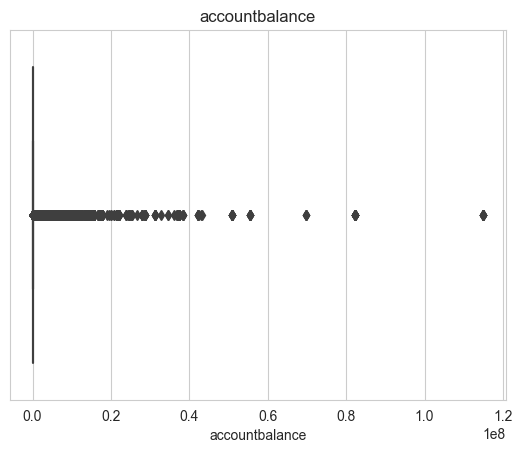

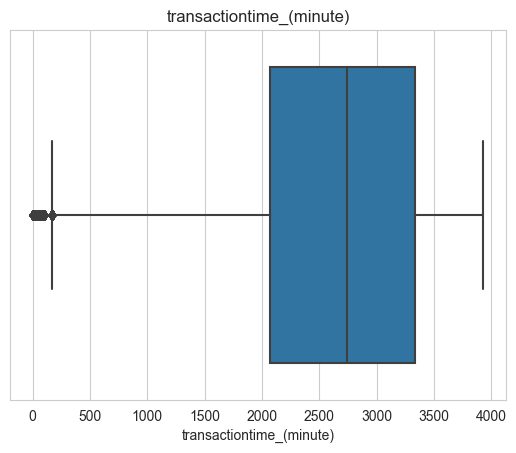

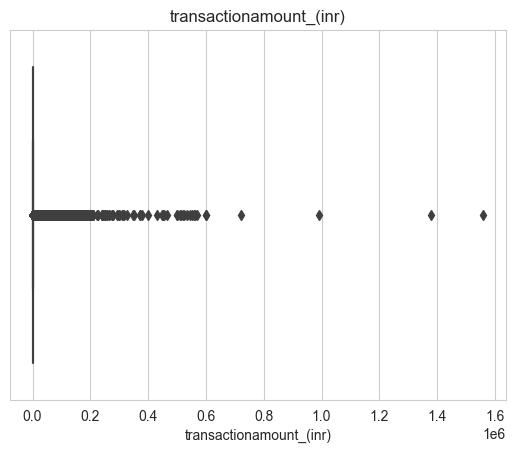

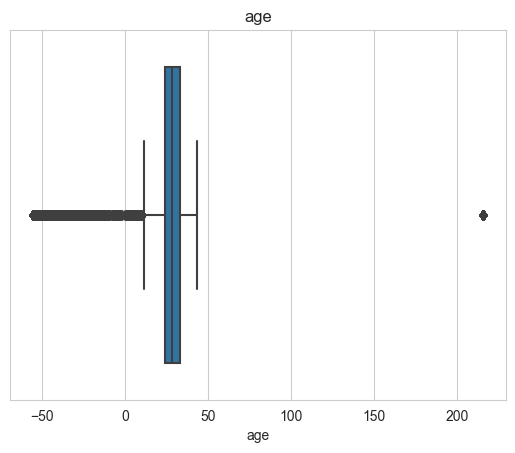

In [18]:
# Checking data accuracy in numerical data
num_data = df.select_dtypes(['int64' , 'float64'])
for i in num_data:
    sns.boxplot(df , x = i)
    plt.title(i)
    plt.show()

In [19]:
# There is something wrong in age
df['age'].describe()

count    879358.000000
mean         32.939253
std          48.734792
min         -56.000000
25%          24.000000
50%          28.000000
75%          33.000000
max         216.000000
Name: age, dtype: float64

In [20]:
# Dealing with anomnalies in age
df = df[(df['age'] >= 0) & (df['age'] <= 50)]

In [21]:
# Dealing with anomalies in gender
df['gender'].value_counts()

M    550545
F    210437
Name: gender, dtype: int64

In [22]:
df.loc[df['gender'] == 'T']

,customerid,dateofbirth,gender,location,accountbalance,transactiondate,transactiontime_(minute),transactionamount_(inr),age


In [23]:
# Drop unnecssary columns (again)
df.drop(columns = ['dateofbirth'] , inplace = True)

# Visualizing numerical and categorical feature

In [24]:
df

,customerid,gender,location,accountbalance,transactiondate,transactiontime_(minute),transactionamount_(inr),age
0,C5841053,F,Jamshedpur,17819.05,2016-02-08,2386,25.0,22
2,C4417068,F,Mumbai,17874.44,2016-02-08,2378,459.0,20
4,C9031234,F,Navi mumbai,6714.43,2016-02-08,3019,1762.5,28
7,C1220223,M,Mumbai,95075.54,2016-02-08,2842,148.0,34
8,C8536061,F,Gurgaon,14906.96,2016-02-08,3213,833.0,28
...,...,...,...,...,...,...,...,...
1048562,C8020229,M,New delhi,7635.19,2016-09-18,3080,799.0,26
1048563,C6459278,M,Nashik,27311.42,2016-09-18,3062,460.0,24
1048564,C6412354,M,Hyderabad,221757.06,2016-09-18,3055,770.0,27
1048565,C6420483,M,Visakhapatnam,10117.87,2016-09-18,3078,1000.0,38


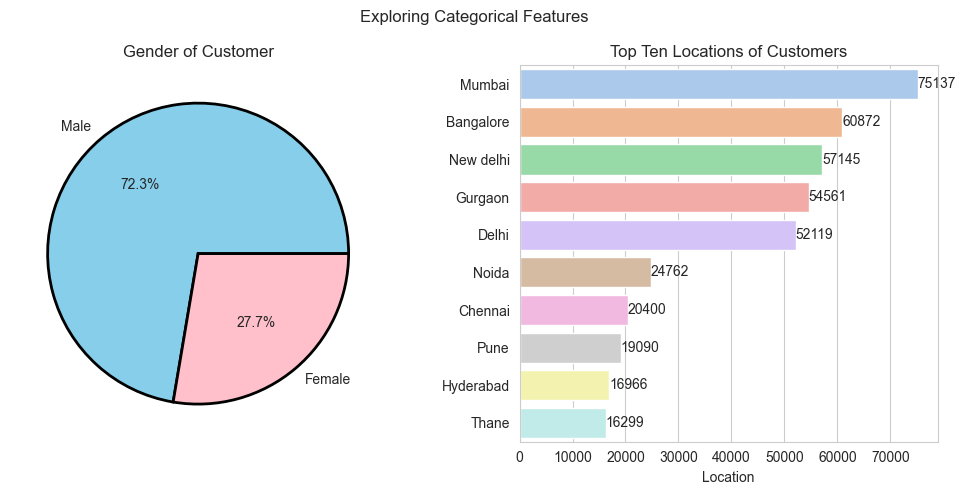

In [25]:
fig = plt.figure(figsize = (10,5))
fig.suptitle('Exploring Categorical Features')
ax1 = fig.add_subplot(1,2,1)
pie = df['gender'].value_counts().to_frame().reset_index()
ax1 = plt.pie(data = pie , x = 'gender' , labels = ['Male','Female'] , autopct = '%1.1f%%' , colors = ['skyblue','pink'],
             wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True})
plt.title('Gender of Customer')

ax2 = fig.add_subplot(1,2,2)
loc_10 = df['location'].value_counts().to_frame().head(10).reset_index()
ax2 = sns.barplot(data = loc_10 , x = 'location' , y = 'index' , palette = 'pastel')
ax2.set_title('Top Ten Locations of Customers')
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel(' ')
ax2.set_xlabel('Location')
plt.tight_layout()

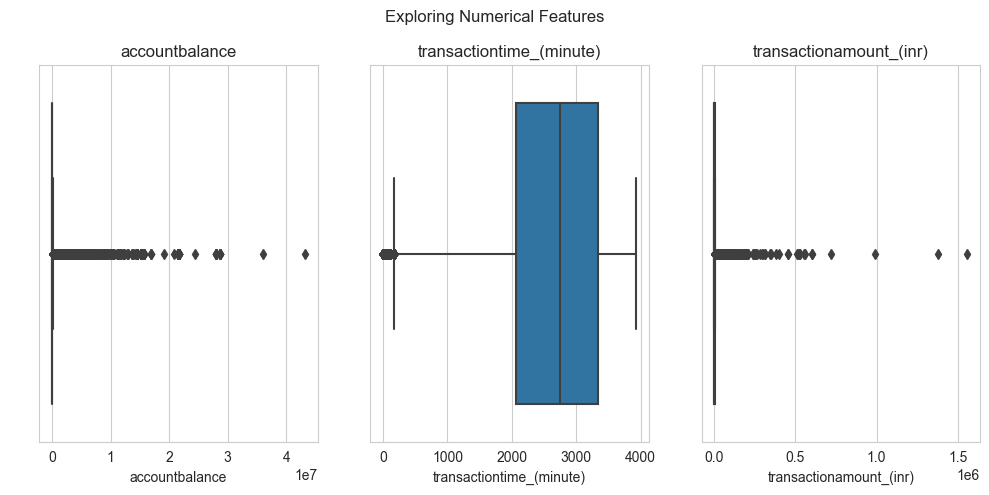

In [26]:
feature = ['accountbalance','transactiontime_(minute)','transactionamount_(inr)']
fig = plt.figure(figsize = (10,5))
fig.suptitle('Exploring Numerical Features')

for i,j in enumerate(feature):
    ax = fig.add_subplot(1,3,i+1)
    ax = sns.boxplot(df , x = j)
    ax.set_title(j)
    ax.set_ylabel(' ')
    

plt.tight_layout()

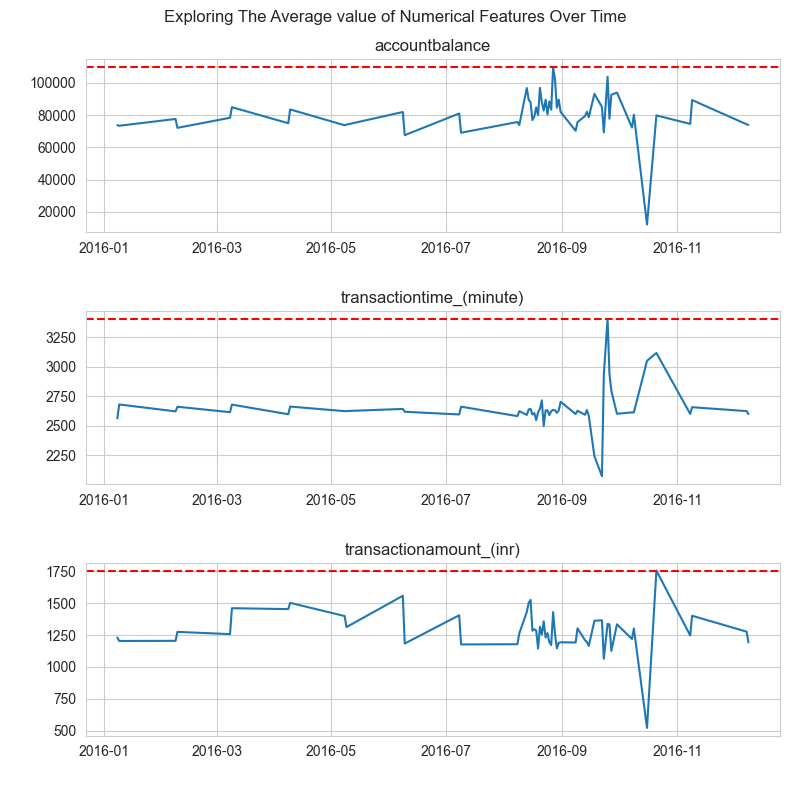

In [27]:
df_numerical = df.groupby('transactiondate').agg({'accountbalance' : 'mean' , 'transactiontime_(minute)' : 'mean' , 'transactionamount_(inr)' : 'mean'}).reset_index()

feature = ['accountbalance','transactiontime_(minute)','transactionamount_(inr)']
fig = plt.figure(figsize = (8,8))
fig.suptitle('Exploring The Average value of Numerical Features Over Time')

for i,j in enumerate(feature):
    ax = fig.add_subplot(3,1,i+1)
    ax = sns.lineplot(df_numerical , x = 'transactiondate' , y = j)
    ax.set_title(j)
    ax.set_ylabel(' ')
    ax.set_xlabel(' ')
    ax.axhline(y  = df_numerical[j].max() ,color="red", linestyle="--")

plt.tight_layout()

# Data Preprocessing

In [28]:
df1 = df.copy()
df1 = df1.drop(columns = ['customerid','location'] , axis = 1)

In [29]:
## Since the data is too much, we will reduce the size of sample into 1 / 3 of the original size
df1 = df1.sample(20000)

In [30]:
# Encode gender
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'F': 0, 'M': 1}


In [31]:
# Scale data
from sklearn.preprocessing import StandardScaler

#Import model
scaler = StandardScaler()

#Choose columns
numerical_columns = ['accountbalance', 'transactiontime_(minute)','transactionamount_(inr)', 'age']

#Copy Dataframe
df1_scaled = df1.copy()

#Transform each column
for i in numerical_columns:
    df1_scaled[i] = scaler.fit_transform(df1_scaled[[i]])

#Reduce the number of features for more explainability 
df1_scaled = df1_scaled.drop(columns = ['gender','transactiondate','transactionamount_(inr)'] , axis = 1)

# Find optimal numbers of clusters

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [33]:
df1_scaled

,accountbalance,transactiontime_(minute),age
683205,-0.172965,-0.727542,-1.094522
880417,-0.159529,1.095232,-1.094522
17663,-0.147513,0.687583,1.083306
176014,-0.103863,1.278091,-0.913036
42026,-0.121708,-1.680276,0.175878
...,...,...,...
79419,-0.130452,0.847148,1.809249
925110,-0.052756,-2.769281,-0.731551
808418,-0.172845,1.214032,-0.005608
979490,-0.131065,-0.725212,-0.550065


## The Elbow Method Vs. Silhouette Score

The major difference between elbow and silhouette scores is that elbow only calculates the euclidean distance whereas 

silhouette takes into account variables such as variance, skewness, high-low differences, etc.

https://vitalflux.com/elbow-method-silhouette-score-which-better/#:~:text=The%20major%20difference%20between%20elbow,high%2Dlow%20differences%2C%20etc.

## The Elbow Method

In [34]:
inertia = []
num_clusters = list(range(1,10))

for k in num_clusters:
    #Instantiate model in range k
    kmeans = KMeans(n_clusters = k)
    #fit model
    kmeans.fit(df1_scaled)
    #append the SSE in k cluster to the list
    inertia.append(kmeans.inertia_)

In [35]:
# Find the elbow spot
cost_kneed = KneeLocator(x = num_clusters , y = inertia , S = 1.0 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 4 clusters


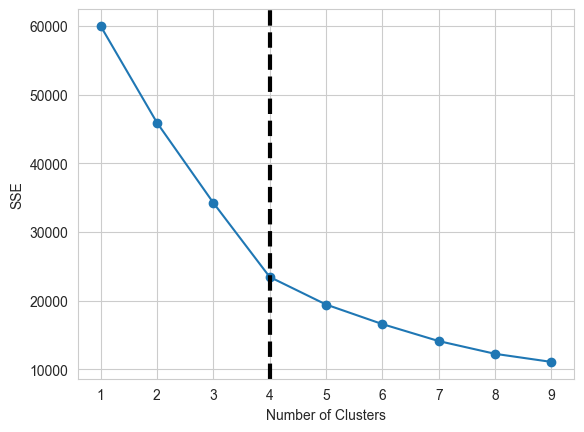

In [36]:
#Plot the graph
plt.plot(num_clusters , inertia , 'o-')    
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#plot vertical line at the elbow spot
plt.axvline(x=K_cost_c3, color='black', label='axvline-fullheight', ls='--', linewidth=3)

**Note : Inertia quantifies how internally coherent the clusters are by measuring the sum of squared distances between each data point and the centroid of its assigned cluster.**

***Criterian for choosing the optimal clusters in elbow method:***

Look for the point from where the SSE plot starts looking linear. In other words, the decrease in SSE is not much after that point.

In this case , four is the optimal number of cluster.

## The Average Silhouette Method

In [37]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#Find the average silhouette score
silhouette_average = []

for k in list(range(2,11)):
    #Create model in k clusters
    model = KMeans(n_clusters = k)
    model.fit(df1_scaled)
    cluster_labels = model.labels_
    #Compute silhouette score in eacg cluster
    score = silhouette_score(df1_scaled , cluster_labels).round(3)
    #Append score to the list
    silhouette_average.append([score , k])
    
print(silhouette_average)

[[0.342, 2], [0.323, 3], [0.378, 4], [0.382, 5], [0.346, 6], [0.348, 7], [0.339, 8], [0.34, 9], [0.334, 10]]


In [38]:
def silhouette_plot(X , from_k , to_k):
    silhouette_scores = []
    for k in range(from_k , to_k):
        #Instantiate model in k clusters
        model = KMeans(n_clusters = k)
        #Instantiate Visualizer model of with k clusters
        visualizer = SilhouetteVisualizer(model)
        #Fit data to the model
        visualizer.fit(X)
        #Draw data
        visualizer.poof()
        #Append score
        silhouette_scores.append([visualizer.silhouette_score_ , k])
    return silhouette_scores 

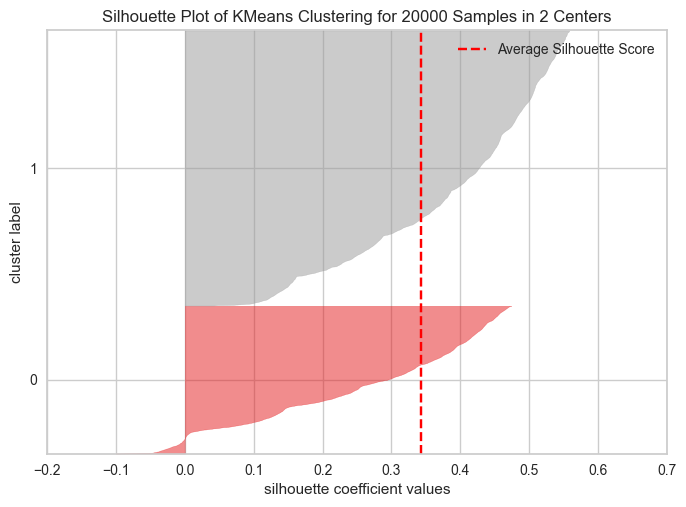

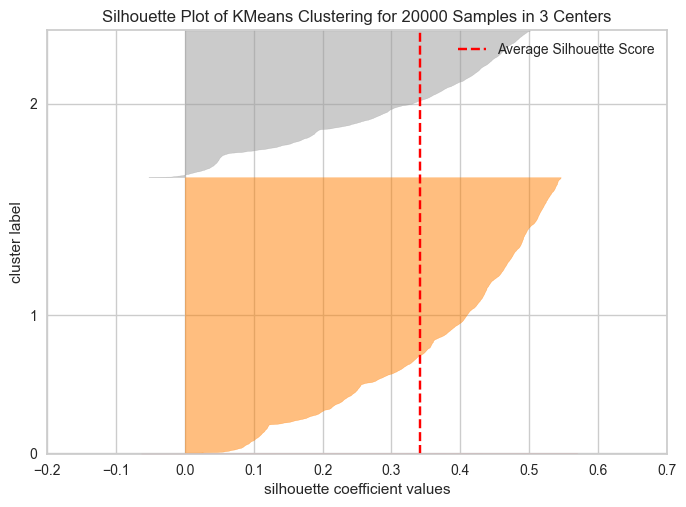

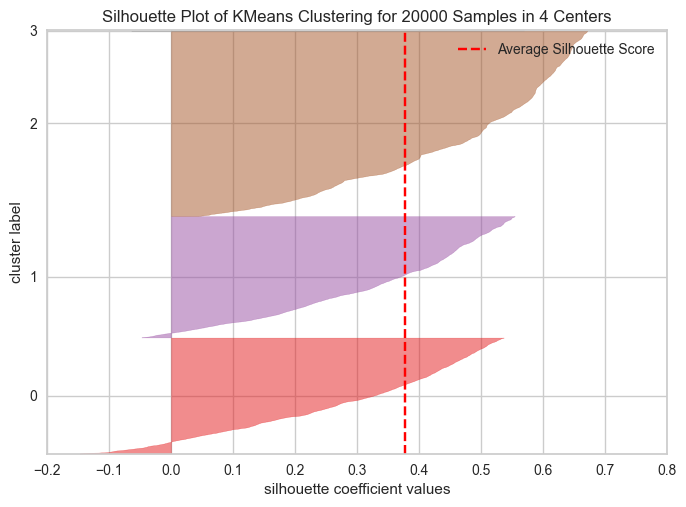

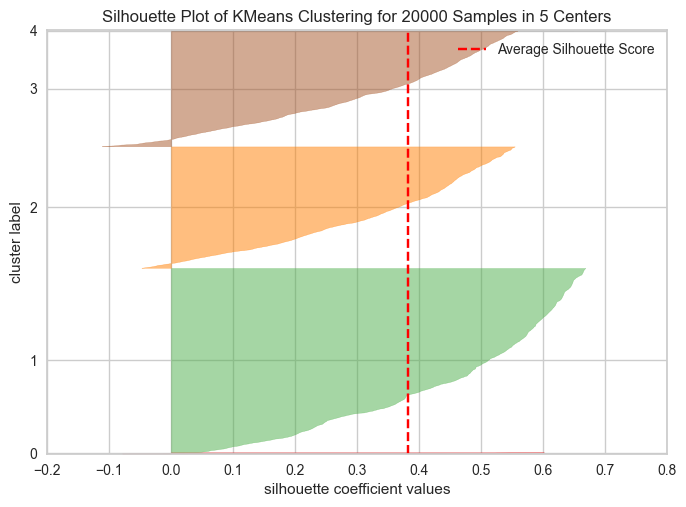

[[0.3423808935411477, 2], [0.3416237568751286, 3], [0.3780529732896063, 4], [0.38241394834281905, 5]]


In [39]:
scores = silhouette_plot(df1_scaled , 2 , 6)
print(scores)

In [40]:
print('The Highest average silhouette score is in cluster {}'.format(max(scores)[1]))

The Highest average silhouette score is in cluster 5


**Criteria for choosing optimal number of clusters with Silhouette method**
- Look for the highest average score and
- consider the number of clusters where all clusters’ plot is beyond average Silhouette score, with mostly uniform thickness and do not have wide fluctuations in the size.

In this case, 5 clusters has the highest average score. However, the flucuation in the size of clusters is tremendous which is similar to 4 , 3 number of clusters.

So, we will choose two as the optimal number of cluster.

## Compute and name clusters

In [56]:
model = KMeans(n_clusters = 2)

In [57]:
model.fit(df1_scaled)

KMeans(n_clusters=2)

In [58]:
model.cluster_centers_.round(4)

array([[-0.0908, -0.0249, -0.6071],
       [ 0.1693,  0.0465,  1.1324]])

In [59]:
model.labels_

array([0, 0, 1, ..., 0, 0, 1])

In [60]:
df1['cluster'] = model.labels_

<Axes: xlabel='cluster', ylabel='count'>

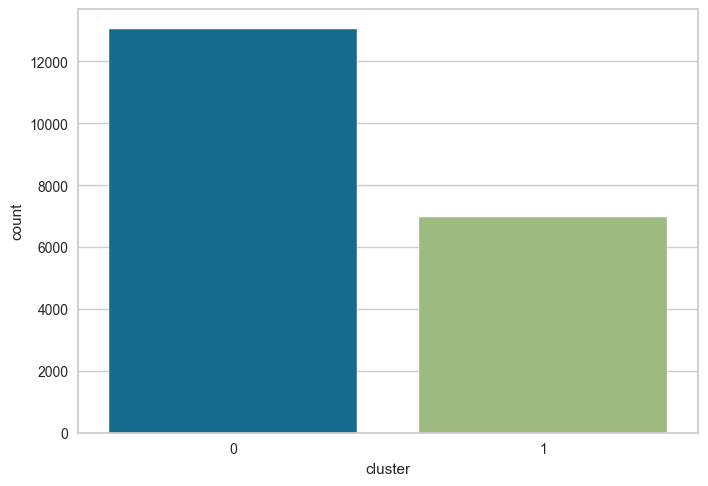

In [62]:
# Count the number of members in each cluster
sns.countplot(df1 , x = 'cluster')

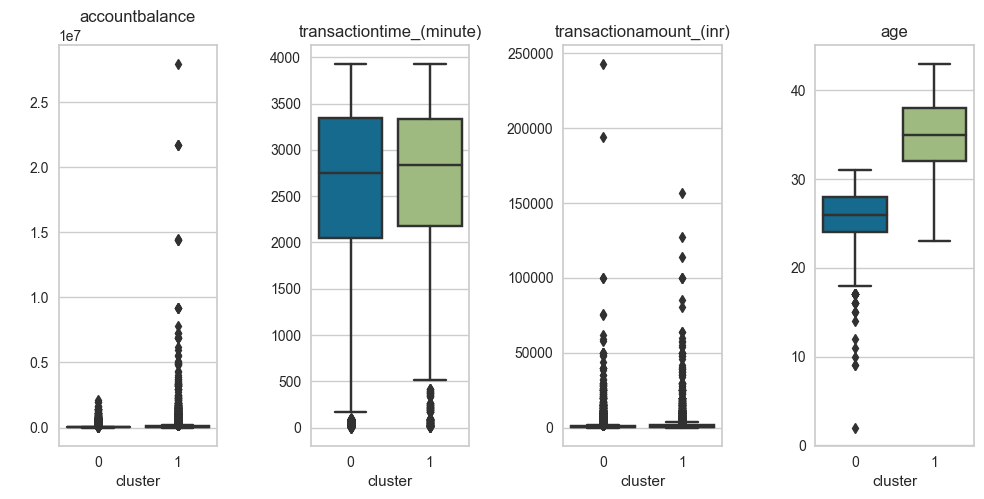

In [82]:
feature = ['accountbalance','transactiontime_(minute)','transactionamount_(inr)','age']
fig = plt.figure(figsize = (10,5))
for i,j in enumerate(feature):   
    ax = fig.add_subplot(1,4,i+1)
    ax = sns.boxplot(x = 'cluster' , y = j , data = df1)
    ax.set_title(j)
    ax.set_ylabel(' ')
plt.tight_layout()

<Axes: ylabel='cluster'>

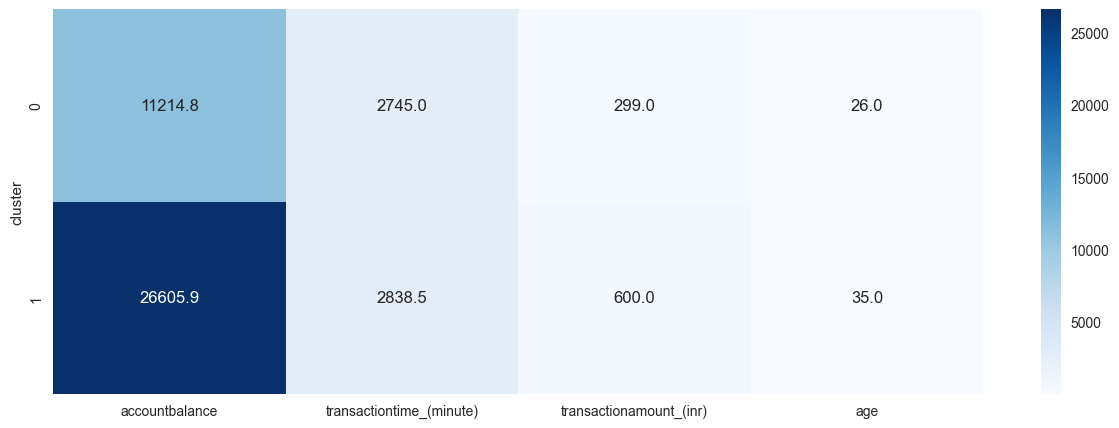

In [96]:
median = df1.groupby('cluster')['accountbalance','transactiontime_(minute)','transactionamount_(inr)','age'].median()
fig = plt.figure(figsize = (15,5))
sns.heatmap(data = median , cmap = 'Blues' , annot = True, fmt = ".1f" )

# Conclusion

From the sample of the dataset, we can divide the customers into two main groups.

1. The cluster 0 represents the customers being around 26 years old. They spend around 299 idr per transaction and spend total time in application for 2745 minutes. They posseses around 11,214 idr in their accounts.
2. The cluster 1 represents the customers being around 35 years old. They spend around 600 idr per transaction and spend total time in application for 2838 minutes. They possesss around 26,605 idr in their account.

In other words, customers in cluster zero are young adulthood who do not spend much per transaction , possess less money compared to the customers in cluster one and spend less time in the bank application.
While the customers in cluster one are in their early middle age. They posseses more money in bank account and spend more than customers in cluster zero. In addition, they spend more time in the bank application.